# 3回目
- 活性化関数をsigmoidからreluに
- filters数を変更
- 層の追加

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage import io
from keras import utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

labels= pd.read_csv("train_master.tsv", sep="\t")
master = pd.read_csv("label_master.tsv", sep="\t")
sample = pd.read_csv("sample_submit.csv", header=None, sep=",")

train_images = []
for fname in labels["file_name"]:
    path = "./train/" + fname
    img = io.imread(path)
    train_images.append(img)
train_images = np.array(train_images)
print(type(train_images), train_images.shape)

test_images = []
for fname in sample[0]:
    path = "./test/" + fname
    img = io.imread(path)
    test_images.append(img)
test_images = np.array(test_images )
print(type(test_images ), test_images.shape)

train_images = train_images / 255
test_images = test_images / 255

y = labels["label_id"]

y_categorical = utils.to_categorical(y)
y_categorical

X_con_image, X_ver_image = np.split(train_images, [40000])
y_con_label, y_ver_label = np.split(y_categorical, [40000])

model = Sequential()

model.add(Conv2D(filters=60, kernel_size=(3,3), padding="same", input_shape=(32,32,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=60, kernel_size=(3,3), padding="same", input_shape=(32,32,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=120, kernel_size=(3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=600))
model.add(Activation("relu"))
model.add(Dense(units=100))
model.add(Activation("relu"))
model.add(Dense(units=20))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy",
             optimizer=optimizers.SGD(lr=0.05, momentum=0.9, decay=0.0, nesterov=True))

batch_size=100
epochs=30

history = model.fit(X_con_image, y_con_label,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_ver_image, y_ver_label))

Using TensorFlow backend.


<class 'numpy.ndarray'> (50000, 32, 32, 3)
<class 'numpy.ndarray'> (10000, 32, 32, 3)
Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 50s 1ms/step - loss: 2.5328 - val_loss: 2.1833
Epoch 2/30
40000/40000 [==============================] - 48s 1ms/step - loss: 2.0792 - val_loss: 1.9757
Epoch 3/30
40000/40000 [==============================] - 47s 1ms/step - loss: 1.8556 - val_loss: 1.8466
Epoch 4/30
40000/40000 [==============================] - 49s 1ms/step - loss: 1.6697 - val_loss: 1.7675
Epoch 5/30
40000/40000 [==============================] - 50s 1ms/step - loss: 1.5056 - val_loss: 1.7443
Epoch 6/30
40000/40000 [==============================] - 51s 1ms/step - loss: 1.3551 - val_loss: 1.7851
Epoch 7/30
40000/40000 [==============================] - 51s 1ms/step - loss: 1.2133 - val_loss: 1.7920
Epoch 8/30
40000/40000 [==============================] - 52s 1ms/step - loss: 1.0958 - val_loss: 1.9399
Epoch 9/30
40000/40000 [

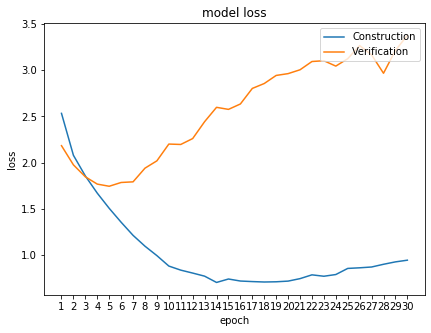

In [5]:
def learning_plot(history, epochs):
    fig = plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(range(1,epochs+1), history.history['loss'])
    plt.plot(range(1,epochs+1), history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.xticks(range(1,epochs+1))
    plt.ylabel('loss')
    plt.legend(['Construction', 'Verification'], loc='upper right')
    plt.show()
    
learning_plot(history,epochs)

In [11]:
pred = model.predict(test_images)
pred
sample[1] = pred
sample.to_csv("submit3_1.csv", sep=",", index=None, header=None)

In [9]:
print(model.evaluate(X_ver_image ,y_ver_label))

10000/10000 [==============================] - 4s 428us/step
3.3765788108825685
